## 收集

In [1]:
import pandas as pd
import requests
import numpy as np
import json
import re
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 

In [2]:
# Read 'twitter-archive-enhanced' contents
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# Read 'tweet_json.txt' contents
tweets = []
for line in open('tweet_json.txt', 'r'):
    tweets.append(json.loads(line))
tweet_json = pd.DataFrame(tweets)

In [4]:
# Read image-predictions.tsv contents
# 设置User-Agent浏览器信息
headers = {
      "User-Agent": "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/57.0.2987.133 Safari/537.36"
}
# 设置请求头信息
response = requests.get('https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv',headers=headers)
with open('image-predictions.tsv','w') as f:
    f.write(response.text)
image_predictions = pd.read_table('image-predictions.tsv')

## 评估

In [5]:
twitter_archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [6]:
twitter_archive.tweet_id.duplicated().sum()

0

In [7]:
twitter_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [8]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
twitter_archive.sort_values(by='rating_numerator',ascending=False).head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


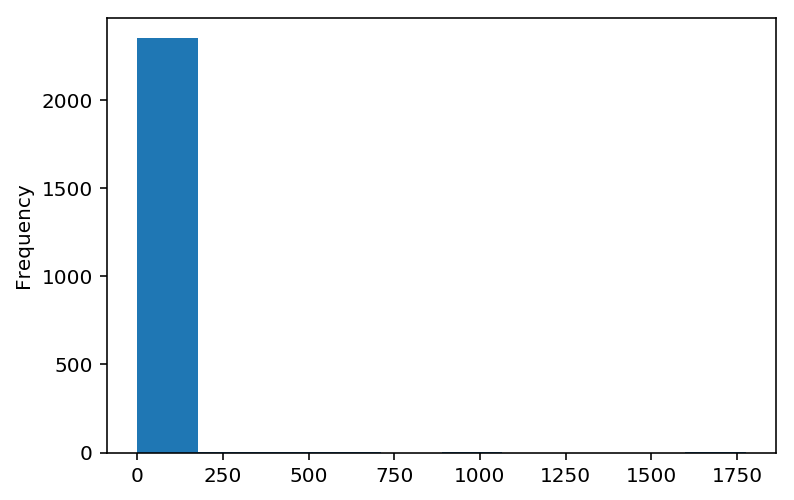

In [11]:
twitter_archive.rating_numerator.plot(kind = 'hist');

In [12]:
# 分子大于50的记录数为18条，不到总记录的1%
twitter_archive[twitter_archive.rating_numerator > 50].shape[0]

18

In [13]:
# 分母需要统一为10
twitter_archive[twitter_archive.rating_denominator != 10].shape[0]

23

In [14]:
pd.options.display.max_colwidth = 400
twitter_archive[twitter_archive.rating_numerator > 50].text.head()

188                                                          @dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research
189           @s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10
290                                                                                                                              @markhoppus 182/10
313                                              @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
340    RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…
Name: text, dtype: object

In [92]:
pd.options.display.max_colwidth = 400
twitter_archive[twitter_archive.rating_denominator != 10].text.head()

313                                                                           @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
342                                                                                                                                     @docmisterio account started on 11/15/15
433                                                                          The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
516    Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
784                                 RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
Name: text, dtype: object

In [16]:
twitter_archive[twitter_archive.timestamp > '2017-08-01'].shape[0]

2

In [17]:
tweet_json.head(1).melt()

,variable,value
0,contributors,None
1,coordinates,None
2,created_at,Tue Aug 01 16:23:56 +0000 2017
3,display_text_range,"[0, 85]"
4,entities,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media..."
5,extended_entities,"{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com..."
6,favorite_count,39492
7,favorited,False
8,full_text,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
9,geo,None


In [18]:
tweet_json.lang.value_counts()

en     2334
und       7
nl        3
in        3
es        1
ro        1
eu        1
et        1
tl        1
Name: lang, dtype: int64

In [19]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2352 non-null object
display_text_range               2352 non-null object
entities                         2352 non-null object
extended_entities                2073 non-null object
favorite_count                   2352 non-null int64
favorited                        2352 non-null bool
full_text                        2352 non-null object
geo                              0 non-null object
id                               2352 non-null int64
id_str                           2352 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

In [20]:
tweet_json.describe()

,favorite_count,id,in_reply_to_status_id,in_reply_to_user_id,quoted_status_id,retweet_count
count,2352.000000,2.352000e+03,7.800000e+01,7.800000e+01,2.900000e+01,2352.000000
mean,8109.198980,7.425913e+17,7.455079e+17,2.014171e+16,8.162686e+17,3134.932398
std,11980.795669,6.846210e+16,7.582492e+16,1.252797e+17,6.164161e+16,5237.846296
min,0.000000,6.660209e+17,6.658147e+17,1.185634e+07,6.721083e+17,0.000000
25%,1417.000000,6.783949e+17,6.757419e+17,3.086374e+08,7.888183e+17,618.000000
50%,3596.500000,7.193536e+17,7.038708e+17,4.196984e+09,8.340867e+17,1456.500000
75%,10118.000000,7.991219e+17,8.257804e+17,4.196984e+09,8.664587e+17,3628.750000
max,132318.000000,8.924206e+17,8.862664e+17,8.405479e+17,8.860534e+17,79116.000000


In [21]:
tweet_json.id.duplicated().sum()

0

In [22]:
image_predictions.head(4)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True


In [23]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [24]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [25]:
image_predictions.duplicated().sum()

0

In [26]:
# 检查三份表格中的重复列
all_columns = pd.Series(list(twitter_archive) + list(tweet_json) + list(image_predictions))
all_columns[all_columns.duplicated()]

30    in_reply_to_status_id
32      in_reply_to_user_id
45                   source
48                 tweet_id
dtype: object

#### 质量
##### `twitter_archive` 表格
- 'tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id' 是浮点，不是字符串
- 'rating_denominator' 有23条记录不是10为分母
- 'rating_numerator' 分子记录值有 Outliner，分子大于50的记录有18条
- `twitter_archive` 表格中有2356条记录，`image_predictions` 表格有2075条记录；部分记录没有图片
- 需要清理掉推特喜爱数为 0 的记录
- 列名'name' 改成 ‘dog_name’
- 'dog_name' 列中的‘None，应该使用np.nan’

##### `tweet_json` 表格
- 列名'lang' 改成 ‘language’
- ‘lang’ 列中的语言都是缩写，修改成完整语言名称

##### `image_predictions` 表格
- 表格中列名过于简要，不易理解。p1 改成 p1_name; p1_dog 改成 p1_dog_outcome，依此类推更改p2，p3
- 统一p1，p2，p3中狗品种的名字格式，用空格替代原本的‘-’，并让单词首字母大写

#### 清洁度
-  `twitter_archive` 表格中 doggo,floofer,pupper,puppo 四列应该合并为 dog_stage
-  `tweet_json` 表格中的 favorite_count 和 retweet_count, lang 是 `twitter_archive_master` 表格的一部分
-  image_predictions表格是 `twitter_archive_master` 表格的一部分

## 清理

In [27]:
twitter_archive_clean = twitter_archive.copy()
tweet_json_clean = tweet_json.copy()
image_predictions = image_predictions.copy()

### 清洁度

##### 定义
`twitter_archive` 表格中 doggo,floofer,pupper,puppo 四列应该合并为 dog_stage,使用melt方法

##### 代码

In [28]:
columns_without_dogstage = [e for e in list(twitter_archive_clean) if e not in ('doggo','floofer','pupper','puppo')] 

In [29]:
#整理没有dog stage的记录
twitter_archive_none_dogstage = twitter_archive.query('doggo == "None" and floofer == "None" and pupper == "None" and puppo == "None"' )
twitter_archive_none_dogstage = twitter_archive_none_dogstage[columns_without_dogstage]
twitter_archive_none_dogstage['dog_stage'] = 'None'
twitter_archive_none_dogstage.shape

(1976, 14)

In [30]:
#整理有dog stage的记录
twitter_archive_with_dogstage = pd.melt(twitter_archive,id_vars=columns_without_dogstage,var_name='dog_stage')
twitter_archive_with_dogstage = twitter_archive_with_dogstage[twitter_archive_with_dogstage.value != 'None']

In [31]:
#合并有多种 dog stage 的记录
twitter_gb = twitter_archive_with_dogstage.groupby(['tweet_id'])['dog_stage'].apply(','.join).reset_index()

In [32]:
twitter_gb.shape

(380, 2)

In [33]:
# 合并有 dog stage 的记录
twitter_archive_with_dogstage = twitter_archive_with_dogstage.drop(['value','dog_stage'],axis=1)
twitter_archive_with_dogstage = twitter_archive_with_dogstage.merge(twitter_gb,how='inner')
twitter_archive_with_dogstage = twitter_archive_with_dogstage.drop_duplicates()

In [34]:
#合并 dog_stage 和没有 dog_stage 的记录
twitter_archive_clean =  twitter_archive_with_dogstage.append(twitter_archive_none_dogstage)
twitter_archive_clean.shape

(2356, 14)

##### 测试

In [35]:
twitter_archive_clean.dog_stage.value_counts()

None             1976
pupper            245
doggo              83
puppo              29
doggo,pupper       12
floofer             9
doggo,floofer       1
doggo,puppo         1
Name: dog_stage, dtype: int64

##### 定义
`tweet_json` 表格中的 favorite_count 和 retweet_count, lang 是 `twitter_archive_master` 表格的一部分

##### 代码

In [36]:
tweet_json_extract = tweet_json_clean[['id','favorite_count','retweet_count','lang']]
tweet_json_extract.shape

(2352, 4)

In [37]:
twitter_archive_clean = pd.merge(right=tweet_json_extract, left=twitter_archive_clean, how='inner', right_on='id', left_on='tweet_id')

In [38]:
# 导出到CSV中会导致数据匹配错误，导出到Excel可以避免此类问题，需要研究原因
twitter_archive_clean.to_excel('merge_test.xls',index=False)

In [39]:
twitter_archive_clean.to_csv('merge_test.csv',index=False)

##### 测试

In [40]:
twitter_archive_clean.shape

(2352, 18)

In [41]:
twitter_archive_clean.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,id,favorite_count,retweet_count,lang
1935,674307341513269249,NaN,NaN,2015-12-08 19:19:32 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",This is life-changing. 12/10 https://t.co/SroTpI6psB,NaN,NaN,NaN,https://vine.co/v/i7nWzrenw5h,12,10,life,None,674307341513269249,12080,7608,en


##### 定义
`image_predictions`表格是 `twitter_archive_master` 表格的一部分

##### 代码

In [42]:
twitter_archive_clean = twitter_archive_clean.merge(image_predictions,how='inner',right_on = 'tweet_id', left_on='tweet_id')

##### 测试

In [43]:
twitter_archive_clean.shape

(2073, 29)

In [44]:
twitter_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage', 'id', 'favorite_count',
       'retweet_count', 'lang', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

### 质量

##### 定义
'tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id' 是浮点，不是字符串

##### 代码

In [45]:
twitter_archive_clean[['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id']] =twitter_archive_clean[['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id']].astype('str')

##### 测试

In [46]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 29 columns):
tweet_id                      2073 non-null object
in_reply_to_status_id         2073 non-null object
in_reply_to_user_id           2073 non-null object
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           2073 non-null object
retweeted_status_user_id      2073 non-null object
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
dog_stage                     2073 non-null object
id                            2073 non-null int64
favorite_count                2073 non-null int64
retweet_count                 2073 non-null int64
lang                          207

##### 定义
'rating_denominator' 有23条记录不是10为分母,'rating_numerator' 分子记录值有 Outliner，分子大于50的记录有18条

清理步骤：
- 使用正则表达式再次从Text中提取 rating_numerator 和 rating_denominator，提取带有小数的分子，Text中如果有2条 rating，到单独处理。
- 对 rating_denominator 做10的Normalize

##### 代码

In [47]:
#获得新的包含小数的分子
def get_numerator(text):
    numerator = re.search(r'[0-9]+([.]{1}[0-9]+){0,1}/',text).group()
    numerator = numerator.replace('/','')
    numerator = round(float(numerator))
    return numerator
twitter_archive_clean['new_numerator'] = twitter_archive_clean.text.apply(get_numerator)

In [48]:
#获得新的包含小数的分母
def get_denominator(text):
    denominator = re.search(r'/[0-9]+([.]{1}[0-9]+){0,1}',text).group()
    denominator = denominator.replace('/','')
    denominator = round(float(denominator))
    return denominator
twitter_archive_clean['new_denominator'] = twitter_archive_clean.text.apply(get_denominator)

In [49]:
#获得text内容中包含的Rating数量
def get_rating_number(text):
    rating_number = len(re.findall(r'[0-9]+([.]{1}[0-9]+){0,1}/[0-9]+([.]{1}[0-9]+){0,1}',text))
    return rating_number
twitter_archive_clean['rating_number'] = twitter_archive_clean.text.apply(get_rating_number)

In [50]:
twitter_archive_clean.rating_number.value_counts()

1    2045
2      27
3       1
Name: rating_number, dtype: int64

In [51]:
# 检查Text内容中大于1个Rating的记录，判断应该选择的Rating，再做二次评估和清理
twitter_archive_clean[twitter_archive_clean.rating_number > 1].text

271        Meet Rufio. He is unaware of the pink legless pupper wrapped around him. Might want to get that checked 10/10 &amp; 4/10 https://t.co/KNfLnYPmYh
285            Meet Eve. She's a raging alcoholic 8/10 (would b 11/10 but pupper alcoholism is a tragic issue that I can't condone) https://t.co/U36HYQIijg
692                      RT @dog_rates: "Yep... just as I suspected. You're not flossing." 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ
831                                     "Yep... just as I suspected. You're not flossing." 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ
999                        This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ
1040           After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
1110                                                            

In [52]:
# 观察到第2052号记录应该选择后面的分数，做编程修改
twitter_archive_clean.loc[2052,'new_numerator'] = 9
twitter_archive_clean.loc[2052,'new_denominator'] = 10

In [53]:
# 对 new_numerator 和 new_denominator 做10的normalize
twitter_archive_clean['denominator_normalize'] = twitter_archive_clean.new_denominator/10
twitter_archive_clean.new_numerator = twitter_archive_clean.new_numerator/twitter_archive_clean.denominator_normalize
twitter_archive_clean.new_numerator = twitter_archive_clean.new_numerator.apply(lambda x : round(x))
twitter_archive_clean.new_denominator = twitter_archive_clean.new_denominator/twitter_archive_clean.denominator_normalize
twitter_archive_clean.new_denominator = twitter_archive_clean.new_denominator.apply(lambda x : round(x))

In [54]:
#重新检查 new_numerator 的分布情况
twitter_archive_clean.new_numerator.sort_values(ascending=False).head(10)

981     1776
1795     420
658       34
518       15
0         14
607       14
223       14
639       14
142       14
119       14
Name: new_numerator, dtype: int64

In [55]:
#剔除 new_numerator 大于15的3条记录
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.new_numerator <= 15]

In [56]:
# 删除中间用于过渡计算的列
twitter_archive_clean = twitter_archive_clean.drop(['rating_number','denominator_normalize','rating_numerator','rating_denominator'],axis=1)

In [57]:
# 命名替换 'new_numerator':'rating_numerator','new_denominator':'rating_denominator'
twitter_archive_clean.rename(columns={'new_numerator':'rating_numerator','new_denominator':'rating_denominator'},inplace=True)

##### 测试

In [59]:
twitter_archive_clean.query("rating_denominator != 10")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating_numerator,rating_denominator


In [60]:
twitter_archive_clean[twitter_archive_clean.rating_numerator > 15]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating_numerator,rating_denominator


##### 定义
 `twitter_archive` 表格中有2356条记录，清理没有图片的记录
##### 代码

In [61]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2070 entries, 0 to 2072
Data columns (total 29 columns):
tweet_id                      2070 non-null object
in_reply_to_status_id         2070 non-null object
in_reply_to_user_id           2070 non-null object
timestamp                     2070 non-null object
source                        2070 non-null object
text                          2070 non-null object
retweeted_status_id           2070 non-null object
retweeted_status_user_id      2070 non-null object
retweeted_status_timestamp    79 non-null object
expanded_urls                 2070 non-null object
name                          2070 non-null object
dog_stage                     2070 non-null object
id                            2070 non-null int64
favorite_count                2070 non-null int64
retweet_count                 2070 non-null int64
lang                          2070 non-null object
jpg_url                       2070 non-null object
img_num                       2

In [62]:
twitter_archive_clean = twitter_archive_clean.dropna(subset=['jpg_url'])

In [63]:
twitter_archive_clean.shape

(2070, 29)

##### 测试

In [64]:
twitter_archive_clean.isnull().sum()

tweet_id                         0
in_reply_to_status_id            0
in_reply_to_user_id              0
timestamp                        0
source                           0
text                             0
retweeted_status_id              0
retweeted_status_user_id         0
retweeted_status_timestamp    1991
expanded_urls                    0
name                             0
dog_stage                        0
id                               0
favorite_count                   0
retweet_count                    0
lang                             0
jpg_url                          0
img_num                          0
p1                               0
p1_conf                          0
p1_dog                           0
p2                               0
p2_conf                          0
p2_dog                           0
p3                               0
p3_conf                          0
p3_dog                           0
rating_numerator                 0
rating_denominator  

##### 定义
需要清理掉推特喜爱数为 0 的记录

##### 代码

In [65]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.favorite_count != 0]

##### 测试

In [66]:
twitter_archive_clean.favorite_count.describe()

count      1991.000000
mean       8917.909091
std       12403.490206
min          81.000000
25%        1966.500000
50%        4113.000000
75%       11273.000000
max      132318.000000
Name: favorite_count, dtype: float64

##### 定义
名'name' 改成 ‘dog_name’,列名'lang' 改成 ‘language’,p1 改成 p1_name; p1_dog 改成 p1_dog_outcome，依此类推更改p2，p3

##### 代码

In [67]:
rename = {'name': 'dog_name', 'lang': 'language','p1':'p1_name','p1_dog':'p1_dog_outcome','p2':'p2_name','p2_dog':'p2_dog_outcome','p3':'p3_name','p3_dog':'p3_dog_outcome'}
twitter_archive_clean.rename(columns=rename, inplace=True) 

##### 测试

In [68]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1991 entries, 0 to 2072
Data columns (total 29 columns):
tweet_id                      1991 non-null object
in_reply_to_status_id         1991 non-null object
in_reply_to_user_id           1991 non-null object
timestamp                     1991 non-null object
source                        1991 non-null object
text                          1991 non-null object
retweeted_status_id           1991 non-null object
retweeted_status_user_id      1991 non-null object
retweeted_status_timestamp    0 non-null object
expanded_urls                 1991 non-null object
dog_name                      1991 non-null object
dog_stage                     1991 non-null object
id                            1991 non-null int64
favorite_count                1991 non-null int64
retweet_count                 1991 non-null int64
language                      1991 non-null object
jpg_url                       1991 non-null object
img_num                       19

##### 定义
'dog_name' 列中的‘None，应该使用np.nan’

##### 代码

In [69]:
def repalce_none(dog_name):
    if dog_name == 'None':
        return np.nan
    else:
        return dog_name

In [70]:
twitter_archive_clean.dog_name = twitter_archive_clean.dog_name.apply(repalce_none)

##### 测试

In [71]:
twitter_archive_clean.dog_name.value_counts()

a              55
Charlie        11
Oliver         10
Cooper         10
Lucy           10
Tucker          9
Penny           9
Sadie           8
Winston         8
Lola            7
the             7
Toby            7
Daisy           7
Bo              6
Bella           6
Stanley         6
an              6
Jax             6
Koda            6
Leo             5
Milo            5
Scout           5
Louis           5
Chester         5
Rusty           5
Bailey          5
Oscar           5
Buddy           5
Dave            5
Oakley          4
               ..
Huxley          1
Mattie          1
Dawn            1
Carll           1
Snoopy          1
Monty           1
Hermione        1
Yoda            1
Mike            1
Rizzo           1
Bluebert        1
Link            1
Bobb            1
Duchess         1
Siba            1
Carter          1
Pablo           1
Lenox           1
Lilly           1
Kawhi           1
Gòrdón          1
Jerome          1
Derby           1
Butter          1
Fynn      

##### 定义
‘lang’ 列中的语言都是缩写，修改成完整语言名称

##### 代码

In [72]:
twitter_archive_clean.language.value_counts()

en    1984
nl       3
in       2
eu       1
et       1
Name: language, dtype: int64

In [73]:
language_abbrev = {'en': 'English',
                'nl': 'Dutch',
                'in': 'India',
                'eu': 'EU languages',
                'ro': 'Romania',
                'et': 'Estonian'}
def abbreviate_language(language):
    ful_name = language_abbrev[language]
    return ful_name
twitter_archive_clean['language'] = twitter_archive_clean.language.apply(abbreviate_language)

##### 测试

In [74]:
twitter_archive_clean.language.value_counts()

English         1984
Dutch              3
India              2
EU languages       1
Estonian           1
Name: language, dtype: int64

##### 定义
统一p1，p2，p3中狗品种的名字格式，用空格替代原本的‘-’，并让单词首字母大写

##### 代码

In [75]:
twitter_archive_clean.p1_name.head(5)

0              Pembroke
1       German_shepherd
2    Labrador_retriever
3              komondor
4             Chihuahua
Name: p1_name, dtype: object

In [76]:
twitter_archive_clean[['p1_name','p2_name','p3_name']].apply(lambda x : x.str.replace('_',' '))
twitter_archive_clean[['p1_name','p2_name','p3_name']] = twitter_archive_clean[['p1_name','p2_name','p3_name']].apply(lambda x : x.str.title())

##### 测试

In [77]:
twitter_archive_clean[['p1_name','p2_name','p3_name']].head(5)

,p1_name,p2_name,p3_name
0,Pembroke,Cardigan,Chihuahua
1,German_Shepherd,Malinois,Norwegian_Elkhound
2,Labrador_Retriever,Chesapeake_Bay_Retriever,German_Short-Haired_Pointer
3,Komondor,Briard,Swab
4,Chihuahua,Toy_Terrier,Muzzle


In [78]:
# 存储数据
twitter_archive_clean.to_excel('twitter_archive_master.xls',index=False)
twitter_archive_clean.to_csv('twitter_archive_master.csv',index=False)

## 分析结论

#### 分析问题 1: 
Tweet Text 中哪些词出现频率较高？

In [79]:
from os import path
from scipy.misc import imread
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [80]:
dir_current = path.dirname('.')

In [81]:
dog_coloring = imread(path.join(dir_current,'dog.jpeg'))

In [82]:
dog_tweet_text = ' '.join(twitter_archive_clean['text'])

In [83]:
stopwords = STOPWORDS.copy()
stopwords.add("https")
stopwords.add("CO")
stopwords.add("af")
stopwords.add("tho")

In [84]:
wc = WordCloud(background_color="white",
               scale=3,
               max_words=3000,
               stopwords=stopwords,
               mask = dog_coloring,
               max_font_size=40,
               random_state=49,
              )

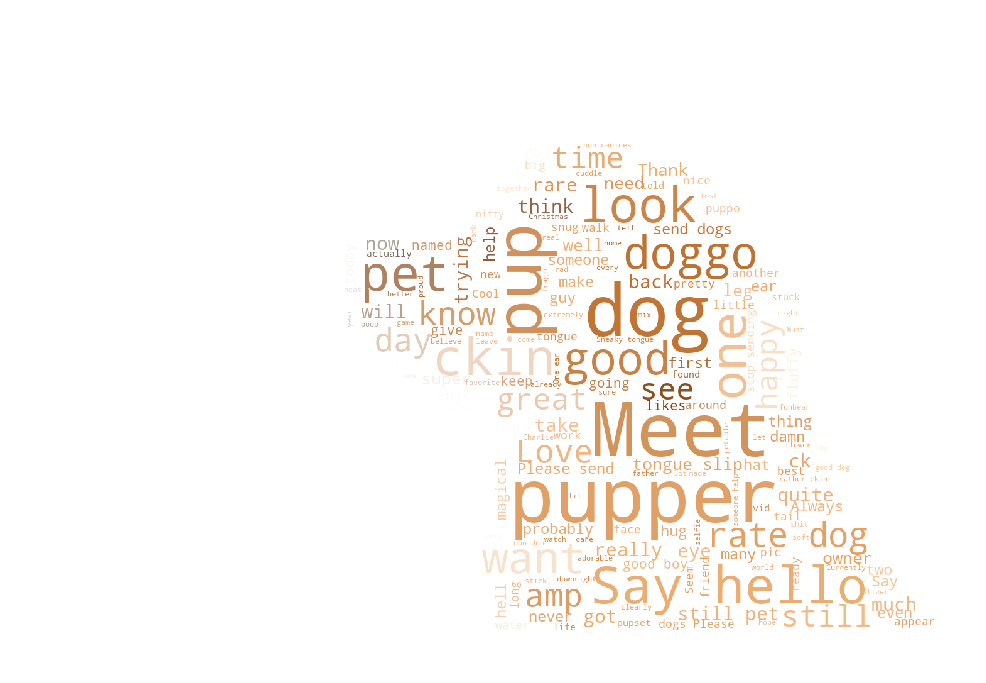

In [86]:
image_colors = ImageColorGenerator(dog_coloring)
wc.generate(dog_tweet_text)
plt.figure(figsize = (8,8))
plt.imshow(wc.recolor(color_func=image_colors))
plt.axis("off")
wc.to_file(path.join(dir_current, "dog_wordcloud.png"));

#### 结论 1:
根据数据中的 Tweet Text 制作的词云， 出现频率较高的几个词为 dog, meet , pup, ckin, good, pupper, doggo, pet, happy。

#### 分析 2:
最常见的狗名字的前十名是哪些？

In [87]:
twitter_archive_clean.dog_name.value_counts().head(20)

a          55
Charlie    11
Oliver     10
Cooper     10
Lucy       10
Tucker      9
Penny       9
Sadie       8
Winston     8
Lola        7
the         7
Toby        7
Daisy       7
Bo          6
Bella       6
Stanley     6
an          6
Jax         6
Koda        6
Leo         5
Name: dog_name, dtype: int64

In [88]:
twitter_archive_clean.dog_name.value_counts().head(20).index

Index(['a', 'Charlie', 'Oliver', 'Cooper', 'Lucy', 'Tucker', 'Penny', 'Sadie',
       'Winston', 'Lola', 'the', 'Toby', 'Daisy', 'Bo', 'Bella', 'Stanley',
       'an', 'Jax', 'Koda', 'Leo'],
      dtype='object')

#### 结论 2: 
根据数据中的记录，排除 None 和 a 后， 排名前十的 Dog Name 是：'Charlie', 'Oliver', 'Cooper', 'Penny', 'Lucy', 'Tucker', 'Lola',   'Bo', 'Sadie', 'Winston'。

#### 分析 3:
各类dog_stage的评分的平均值对比如何？

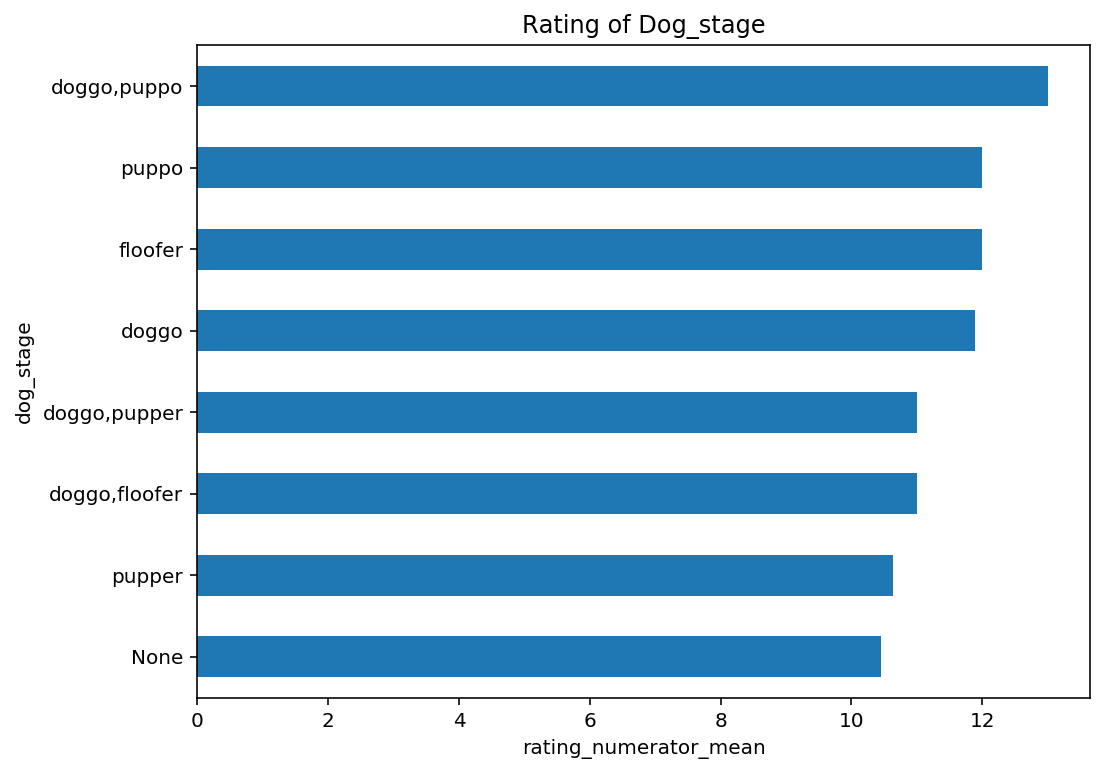

In [89]:
dog_stage_rating = twitter_archive_clean.groupby('dog_stage')['rating_numerator'].mean().sort_values()
plt.figure(figsize=(8, 6))
ax = dog_stage_rating.plot(kind = 'barh')
ax.set_title('Rating of Dog_stage')
ax.set_xlabel('rating_numerator_mean')
ax.set_ylabel('dog_stage');

#### 结论 3: 
分析了不同 Dog_stage 的评分平均值， 排名最高的是doggo,puppo, 第二名是puppo， 第三名是floofer； 其中puppo，floofer，doggo得分接近，puppet得分最低。

#### 分析 4:
Tweeter 的 点赞量 favorite_count 和 转发量 retweet_count 是否存在线性相关关系？

In [90]:
from scipy import stats

r-squared:0.84
p_value:0.000000e+00
retweet_count=0.35*favorite_count +-335.84


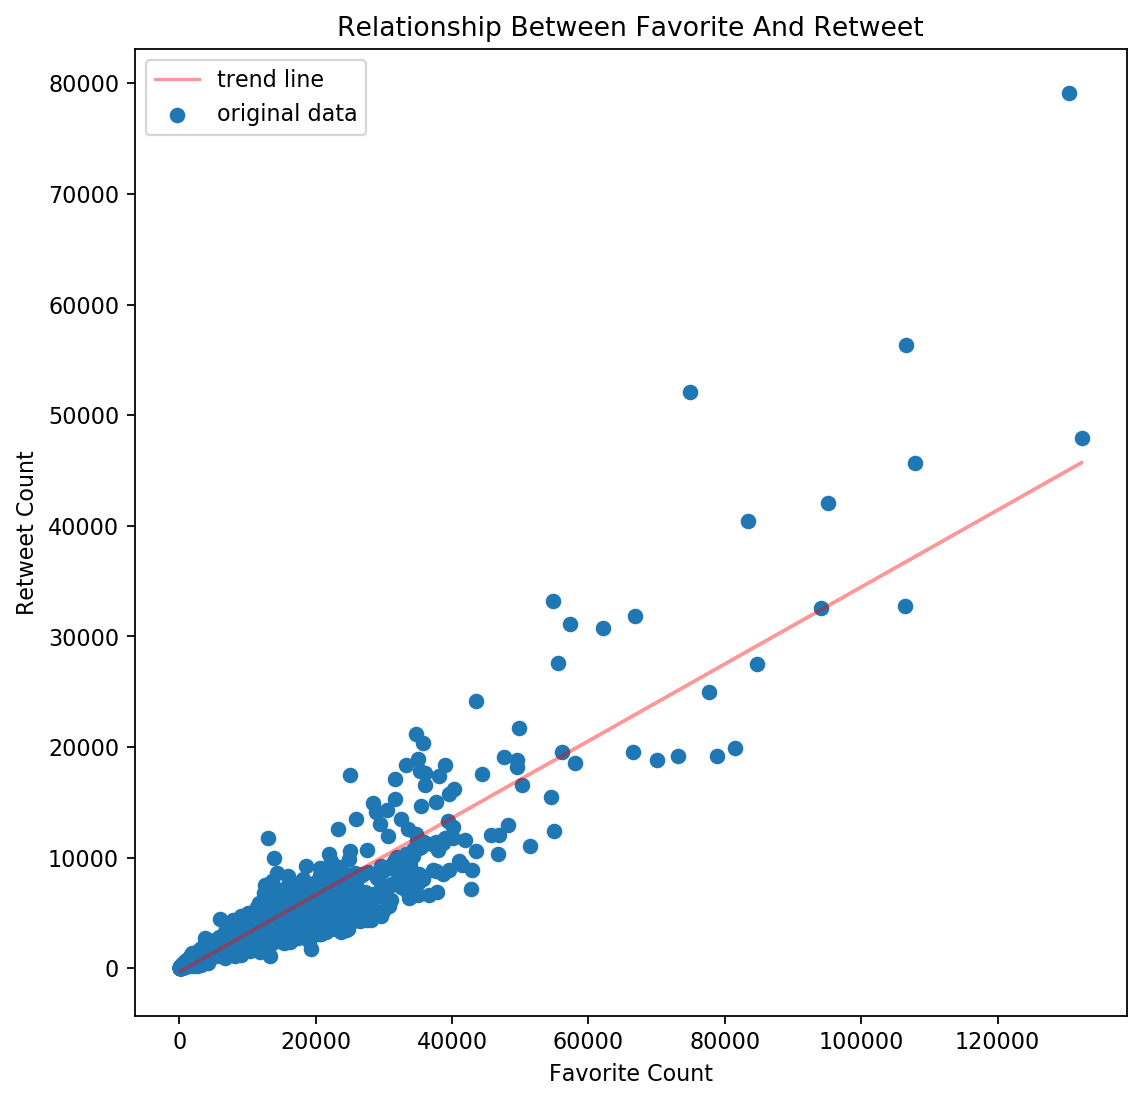

In [91]:
q4_x = twitter_archive_clean['favorite_count']
q4_y = twitter_archive_clean['retweet_count']

plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(q4_x, q4_y,label='original data')
slope, intercept, r_value,p_value= stats.linregress(q4_x, q4_y)[:4]
plt.plot(q4_x,intercept+slope*q4_x,"r",alpha=0.4,label='trend line')

plt.legend(loc=2)
plt.xlabel('Favorite Count')
plt.ylabel('Retweet Count')
plt.title('Relationship Between Favorite And Retweet');

print("r-squared:%.2f"%(r_value**2))
print("p_value:%e"%(p_value))
print("retweet_count=%.2f*favorite_count +%.2f"%(slope,intercept))

#### 结论 4:
Tweeter 的 点赞量 favorite_count 和 转发量 retweet_count 存在线性正相关性，两者的线性相关关系为：retweet_count=0.33*favorite_count +126.42

#### 分析 5:
该话题的Tweet发送量随时间的变化趋势怎么样的？

该问题使用Tableau做可视化分析，根据月份来统计，Tweet发送量变化。
![](Tweet 发送量的变化趋势.png)

#### 结论 5:
该话题于2015年12月最为活跃，当月Tweet发送量为365条，随后活跃度逐渐下降，自2016年4月至2017年4月，当月Tweet发送量基本维持在50-100条之间。